# Experimental data for Bandit OGD with d+1 point Feedback

Dhamma Kimpara

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import generator as gen
import optimizer as opt
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kappa = 100
n = 20
d = 5
iters = 100
loss_seq = gen.generate_ls_seq(n, d, gen.xstar2(d), iters)

G1 = d*6

eta = 1 / (2 * G1)
delta = np.log(iters)/iters
xi = delta/1.0

G = 6 


tracking_errs0, regs0 = opt.gradient_descent(loss_seq, opt.project_ball, 0.9)
tracking_errs1, regs1 = opt.bandit_descent(loss_seq, opt.project_ball, eta, delta, xi)


In [8]:
def regret_sequence(tracking_errs, G, rho):
    reg_bound = [0]
    for i in range(len(tracking_errs) - 1):
        k1 = (tracking_errs[0] - rho * tracking_errs[i + 1]) / (1-rho)
        k2 = 1/(1-rho)
        reg_bound.append(k1*G*i + G*k2)
    return reg_bound
def regret_sequence_bandit(tracking_errs, G1, G, rho, d): #G1 is gradient bound of estimator G is lipschitz of ell_t
    reg_bound = [0]
    for i in range(len(tracking_errs) - 1):
        k1 = (tracking_errs[0] - rho * tracking_errs[i + 1]) / (1-rho)
        k2 = 1/(1-rho)
        reg_bound.append(k1*G1*i + G1*k2 + G * np.log(i+1)*(1+2*d*G + 1))
    return reg_bound

In [9]:
rho = max([np.abs(1 - 0.9/np.sqrt(kappa)), np.abs(1 - 0.9)])
rho_bandit = np.sqrt(1 - eta / np.sqrt(kappa))


bounds0 = regret_sequence(tracking_errs0, G,rho)
bounds1 = regret_sequence_bandit(tracking_errs1, G1, G, rho_bandit, d)

### Results for $\sigma=1$

Text(0, 0.5, '$Regret_t^d$')

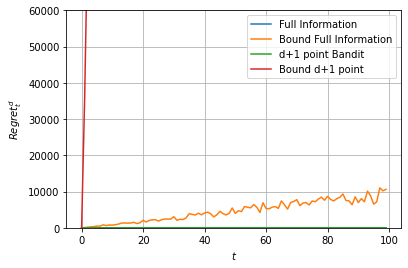

In [19]:
plt.plot(range(len(regs0)), regs0, label="Full Information")
plt.plot(range(len(regs0)), bounds0, label="Bound Full Information")

plt.plot(range(len(regs1)), regs1, label="d+1 point Bandit")
plt.plot(range(len(regs1)), bounds1, label="Bound d+1 point")


#plt.axhline(1/(1-rho), linestyle='--', label="Asymptotic bound")
plt.grid()
plt.ylim([0, 60000.0])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$Regret_t^d$")